In [1]:
import pandas as pd
import numpy as np

#データの読み込み
diet_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/korean/Diet_dataset.csv')
disorder_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/korean/Eating_Disorder_dataset.csv')

diet_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/japanese/diet_data.csv')
disorder_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/japanese/disorder_data.csv')

In [2]:
diet_k.head()

,제목,내용,작성 일자,작성자,label,Unnamed: 5
0,서면 웨딩 다이어트 쥬비스로 -22kg 감량하고 최저체중으로 결혼식 올렸어요 ~!,안녕하세요 ^^\n세상을 건강하게 변화시키는 기업\n★ 감량 달성율 1위 지점 ★\...,2024.10.28. 14:18,빵복,1,NaN
1,평촌역 근처 다이어트 10kg 이상 빨리 빼려면 여기!,안녕하세요~ 평촌역 근처 다이어트 찾으세요?\n주부고객님들을 이해하고 관리 방향을\...,2024.10.28. 01:53,다이엇터달콩,1,NaN
2,다이어트붓기차/쉐이크 엄청나게 할인하네요!,"쿠폰이랑 쓰면 엄청나게 할인하네요\n올마이바디라는 앱인데, 할인율도크고 좋네요!",2024.10.24. 17:56,라라린드,1,NaN
3,평택 다이어트약 지어볼려구요,요즘 다이어트중이거든요\n운동도 하루에 1시간~2시간 하고 있는데\n역시나 식단을 ...,2024.10.18. 09:36,보라보라쨍이,1,NaN
4,다이어트 중이라 오메가3 챙겨 먹기 시작했어요ㅋㅋ,다이어트하다 보니 아무래도 식단이 제한적이라\n영양이 부족해지는 것 같아서\n오메가...,2024.10.17. 13:48,야기해,1,NaN


In [3]:
#韓国語データ人数確認
unique_authors_count = diet_k['작성자'].nunique()
print(f"ダイエットブログ投稿者の人数: {unique_authors_count}")
unique_authors_count = disorder_k['작성자'].nunique()
print(f"摂食障害ブログ投稿者の人数: {unique_authors_count}")

ダイエットブログ投稿者の人数: 11756
摂食障害ブログ投稿者の人数: 9098


In [4]:
diet_k.head()

,제목,내용,작성 일자,작성자,label,Unnamed: 5
0,서면 웨딩 다이어트 쥬비스로 -22kg 감량하고 최저체중으로 결혼식 올렸어요 ~!,안녕하세요 ^^\n세상을 건강하게 변화시키는 기업\n★ 감량 달성율 1위 지점 ★\...,2024.10.28. 14:18,빵복,1,NaN
1,평촌역 근처 다이어트 10kg 이상 빨리 빼려면 여기!,안녕하세요~ 평촌역 근처 다이어트 찾으세요?\n주부고객님들을 이해하고 관리 방향을\...,2024.10.28. 01:53,다이엇터달콩,1,NaN
2,다이어트붓기차/쉐이크 엄청나게 할인하네요!,"쿠폰이랑 쓰면 엄청나게 할인하네요\n올마이바디라는 앱인데, 할인율도크고 좋네요!",2024.10.24. 17:56,라라린드,1,NaN
3,평택 다이어트약 지어볼려구요,요즘 다이어트중이거든요\n운동도 하루에 1시간~2시간 하고 있는데\n역시나 식단을 ...,2024.10.18. 09:36,보라보라쨍이,1,NaN
4,다이어트 중이라 오메가3 챙겨 먹기 시작했어요ㅋㅋ,다이어트하다 보니 아무래도 식단이 제한적이라\n영양이 부족해지는 것 같아서\n오메가...,2024.10.17. 13:48,야기해,1,NaN


In [5]:
# 列名を変更する
diet_k.rename(columns={
    '제목': 'title',
    '내용': 'text',
    '작성 일자': 'date',
    '작성자': 'user',
    'label': 'category'
}, inplace=True)

# 不要な列を削除する
diet_k.drop(columns=['Unnamed: 5'], inplace=True)

# 列の順番を変更する
diet_k = diet_k[['user', 'date', 'title', 'text', 'category']]
# category列の値をすべて "0" に変更
diet_k['category'] = 0 

# 結果を確認（または保存）
print(diet_k.head())  # データフレームの最初の数行を表示
diet_k.to_csv('diet_cleaned.csv', index=False)  

     user               date                                          title  \
0      빵복  2024.10.28. 14:18  서면 웨딩 다이어트 쥬비스로 -22kg 감량하고 최저체중으로 결혼식 올렸어요 ~!   
1  다이엇터달콩  2024.10.28. 01:53                 평촌역 근처 다이어트 10kg 이상 빨리 빼려면 여기!   
2    라라린드  2024.10.24. 17:56                        다이어트붓기차/쉐이크 엄청나게 할인하네요!   
3  보라보라쨍이  2024.10.18. 09:36                                평택 다이어트약 지어볼려구요   
4     야기해  2024.10.17. 13:48                    다이어트 중이라 오메가3 챙겨 먹기 시작했어요ㅋㅋ   

                                                text  category  
0  안녕하세요 ^^\n세상을 건강하게 변화시키는 기업\n★ 감량 달성율 1위 지점 ★\...         0  
1  안녕하세요~ 평촌역 근처 다이어트 찾으세요?\n주부고객님들을 이해하고 관리 방향을\...         0  
2       쿠폰이랑 쓰면 엄청나게 할인하네요\n올마이바디라는 앱인데, 할인율도크고 좋네요!         0  
3  요즘 다이어트중이거든요\n운동도 하루에 1시간~2시간 하고 있는데\n역시나 식단을 ...         0  
4  다이어트하다 보니 아무래도 식단이 제한적이라\n영양이 부족해지는 것 같아서\n오메가...         0  


In [6]:
# 列名を変更する
disorder_k.rename(columns={
    '제목': 'title',
    '내용': 'text',
    '작성 일자': 'date',
    '작성자': 'user',
    'label': 'category'
}, inplace=True)

# 不要な列を削除する
disorder_k.drop(columns=['Unnamed: 5'], inplace=True)

# 列の順番を変更する
disorder_k = disorder_k[['user', 'date', 'title', 'text', 'category']]
# category列の値をすべて "1" に変更
disorder_k['category'] = 1 

# 結果を確認（または保存）
print(disorder_k.head())  # データフレームの最初の数行を表示
disorder_k.to_csv('disorder_cleaned.csv', index=False)  

    user               date                     title  \
0  네모단호박  2024.10.10. 20:46     급하게 증량하니 생각이 너무 많아졌어요   
1   할소율다  2024.08.24. 21:33                   너무 불안해요   
2     펭치  2024.08.08. 09:40                여행,결혼식,졸업식   
3     펭치  2024.08.07. 18:52          피어푸드 극복하는 6가지 방법   
4   마두이리  2024.08.05. 20:10  배부른 게 싫은 느낌,, 과식하면 기분 나쁨   

                                                text  category  
0  지난 주 1박 2일 여행가서 강박 없이 먹으면서 , 먹고 와서 불안감에 몸무게 재봤...         1  
1  원래 매일매일 무슨일이 있어도 런닝머신을 좀 많이 심하게.. 탔는데(심하면 2번씩도...         1  
2  식이장애 중에 다이어트 강박을 가진 분들 대부분이 여행이나 결혼식, 졸업식 때 잘보...         1  
3  1. 쿠키, 시리얼 같은 과자 유형: 폭식하지 않던 음식, 두려워하지 않았던 음식과...         1  
4  많이 나아졌다고 생각하는데 가끔 다이어트를 해야한다는 그 마인드가 아직도 남아있는 ...         1  


In [7]:
disorder_k.head()

,user,date,title,text,category
0,네모단호박,2024.10.10. 20:46,급하게 증량하니 생각이 너무 많아졌어요,"지난 주 1박 2일 여행가서 강박 없이 먹으면서 , 먹고 와서 불안감에 몸무게 재봤...",1
1,할소율다,2024.08.24. 21:33,너무 불안해요,원래 매일매일 무슨일이 있어도 런닝머신을 좀 많이 심하게.. 탔는데(심하면 2번씩도...,1
2,펭치,2024.08.08. 09:40,"여행,결혼식,졸업식","식이장애 중에 다이어트 강박을 가진 분들 대부분이 여행이나 결혼식, 졸업식 때 잘보...",1
3,펭치,2024.08.07. 18:52,피어푸드 극복하는 6가지 방법,"1. 쿠키, 시리얼 같은 과자 유형: 폭식하지 않던 음식, 두려워하지 않았던 음식과...",1
4,마두이리,2024.08.05. 20:10,"배부른 게 싫은 느낌,, 과식하면 기분 나쁨",많이 나아졌다고 생각하는데 가끔 다이어트를 해야한다는 그 마인드가 아직도 남아있는 ...,1


In [8]:
# text列に欠損値がある行を削除
diet_k.dropna(subset=['text'], inplace=True)
disorder_k.dropna(subset=['text'], inplace=True)

# text列に欠損値がある行を削除
diet_j.dropna(subset=['text'], inplace=True)
disorder_j.dropna(subset=['text'], inplace=True)

In [14]:
len(diet_j)

406562

In [9]:
# 欠損値の確認
print(disorder_k.isnull().sum())

user        0
date        0
title       0
text        0
category    0
dtype: int64


In [10]:
import re
import os
import pandas as pd

# テキストをクリーンアップする関数
def clean_text(text):
    if not isinstance(text, str):
        # 非文字列の場合は空文字列に置き換え
        text = str(text) if pd.notnull(text) else ""
    # URLを削除
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 絵文字、記号、改行、特殊文字を削除
    text = re.sub(r'[^\w\s]|[\r\n\xa0\t\f\v\u200b\u3000]', '', text)
    # 連続するスペースを半角スペース1つに置換
    text = re.sub(r'\s+', ' ', text)
    # テキストの両端のスペースを削除
    return text.strip()

# データフレームリストと名前
datasets = {
    "diet_k": diet_k,
    "disorder_k": disorder_k,
    "diet_j": diet_j,
    "disorder_j": disorder_j
}

# 保存先ディレクトリ
output_dir = "/home/is/sakiho-k/research/data/pretreated"
os.makedirs(output_dir, exist_ok=True)

# 各データセットの前処理と保存
for dataset_name, df in datasets.items():
    print(f"Processing {dataset_name}...")
    # テキスト列を文字列型に変換してクリーンアップ
    df['text'] = df['text'].astype(str).apply(clean_text)
    # 保存
    output_path = os.path.join(output_dir, f"{dataset_name}_preprocessed.csv")
    df.to_csv(output_path, index=False)
    print(f"Processed {dataset_name} saved to {output_path}")

Processing diet_k...
Processed diet_k saved to /home/is/sakiho-k/research/data/pretreated/diet_k_preprocessed.csv
Processing disorder_k...
Processed disorder_k saved to /home/is/sakiho-k/research/data/pretreated/disorder_k_preprocessed.csv
Processing diet_j...
Processed diet_j saved to /home/is/sakiho-k/research/data/pretreated/diet_j_preprocessed.csv
Processing disorder_j...
Processed disorder_j saved to /home/is/sakiho-k/research/data/pretreated/disorder_j_preprocessed.csv


In [11]:
#欠損値の確認
print(diet_j.isnull().sum())

sex         102361
age         374032
user           220
url              0
date             0
title            3
text             0
category         0
dtype: int64


In [12]:
duplicate_count = diet_j.duplicated(subset="text").sum()
print(f"重複したtextの数: {duplicate_count}")

重複したtextの数: 16281


In [67]:
import pandas as pd
import os

# 訓練・テストデータに分割する関数
def split_data(df, train_size=23200, test_size=5800, random_state=0):
    # text列がNaNまたは空文字列の行を削除
    df = df[df['text'].notna() & (df['text'] != '')]
    
    # シャッフル
    shuffled_df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # 訓練データとテストデータに分割
    train_data = shuffled_df.iloc[:train_size]
    test_data = shuffled_df.iloc[train_size:train_size + test_size]
    return train_data, test_data

# データフレームリストと名前
datasets = {
    "diet_k": diet_k,
    "disorder_k": disorder_k,
    "diet_j": diet_j,
    "disorder_j": disorder_j
}

# 保存先ディレクトリ
output_dir = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split"
os.makedirs(output_dir, exist_ok=True)

# 各データセットを訓練・テストデータに分割して保存
for dataset_name, df in datasets.items():
    print(f"Splitting {dataset_name}...")
    train_data, test_data = split_data(df)
    
    # 保存
    train_output_path = os.path.join(output_dir, f"{dataset_name}_train.csv")
    test_output_path = os.path.join(output_dir, f"{dataset_name}_test.csv")
    train_data.to_csv(train_output_path, index=False)
    test_data.to_csv(test_output_path, index=False)
    
    print(f"Train data saved to {train_output_path} ({len(train_data)} rows)")
    print(f"Test data saved to {test_output_path} ({len(test_data)} rows)")

Splitting diet_k...
Train data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_train.csv (23200 rows)
Test data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv (5800 rows)
Splitting disorder_k...
Train data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_train.csv (23200 rows)
Test data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv (5800 rows)
Splitting diet_j...


Train data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_train.csv (23200 rows)
Test data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv (5800 rows)
Splitting disorder_j...
Train data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_train.csv (23200 rows)
Test data saved to /home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv (5800 rows)


In [68]:
# データの読み込み
train_diet_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_train.csv')
test_diet_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv')

train_disorder_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_train.csv')
test_disorder_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv')

train_diet_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_train.csv')
test_diet_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv')

train_disorder_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_train.csv')
test_disorder_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv')

len(train_diet_k), len(test_diet_k), len(train_disorder_k), len(test_disorder_k), len(train_diet_j), len(test_diet_j), len(train_disorder_j), len(test_disorder_j)

(23200, 5800, 23200, 5800, 23200, 5800, 23200, 5800)

In [72]:
# 欠損値の確認
test_diet_j.isnull().sum()

sex         1412
age         5323
user           2
url            0
date           0
title          0
text           0
category       0
dtype: int64

In [73]:
test_disorder_j.head()

,sex,age,user,url,date,title,text,category
0,女性,～19才,kirie1229,https://ameblo.jp/kirie1229/page-475.html,2014-05-14,おはよーござい,頭いたーい腹痛と頭痛で起きました寝たには寝たんですけどね中途半端な時間にまたもーコンビニ行き...,1
1,女性,20～34才,matsushitaandayaka,https://ameblo.jp/matsushitaandayaka/page-163....,2019-12-19,予定通り退院,こんにちは今日の9時に予定通り退院しました大量のラコールもらって主治医が年末年始大変になる前...,1
2,NaN,NaN,ohmiky-masahi,https://ameblo.jp/ohmiky-masahi/page-294.html,2022-02-01,止まらない美味しさ無限系♪我が家定番大根とキャベツ、スイーツのような焼き芋と干し芋,朝ごはんベーコンと野菜のスープ大根の甘酢漬け大根826ｇＡ水カップ1砂糖130ｇ酢カップ1塩...,1
3,女性,～19才,de-mi-chan,https://ameblo.jp/de-mi-chan/page-315.html,2011-12-11,東京モーターショー②,20時になり東京モーターショーは閉園を迎えましたが東京ビックサイト８階にあるレストランは21...,1
4,NaN,NaN,19813580,https://ameblo.jp/19813580/page-11.html,2011-11-08,2011/11/03,彼とデートトゥールーズロートレック展を見に行きました帰りは皇居の周りを散歩気持ち良かったです...,1


# テストデータ

In [6]:
#採用
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import torch
from sklearn.metrics import classification_report
from tqdm import tqdm  # tqdmをインポート

# モデルとトークナイザーのロード
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return tokenizer, model

# データの読み込みとマージ
def load_and_merge_data(diet_path, disorder_path):
    diet_data = pd.read_csv(diet_path)
    disorder_data = pd.read_csv(disorder_path)
    merged_data = pd.concat([diet_data, disorder_data], ignore_index=True)
    return merged_data

# テストデータで評価
def evaluate_model(model, tokenizer, test_data, device):
    model.to(device)
    model.eval()

    # テキストとラベルの取得
    texts = test_data["text"].tolist()
    labels = test_data["category"].tolist()

    predictions = []

    with torch.no_grad():
        # tqdmを使って進捗バーを追加
        for text in tqdm(texts, desc="Evaluating", unit="example"):
            # `text` が文字列であることを確認
            if isinstance(text, str):
                inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
                outputs = model(**inputs)
                preds = torch.argmax(outputs.logits, dim=1).cpu().item()
                predictions.append(preds)
            else:
                print(f"Warning: Non-string data found in text: {text}")

    # 評価指標の計算
    report = classification_report(labels, predictions, target_names=["Diet", "Disorder"], digits=4)
    return report

# ファイルパス
japanese_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/japanese_finetuned_model_best_fold"
korean_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/korean_finetuned_model_best_fold"

diet_j_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv"
disorder_j_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv"

diet_k_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv"
disorder_k_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv"

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 日本語データ評価
print("Evaluating Japanese model on Japanese data...")
japanese_test_data = load_and_merge_data(diet_j_test_path, disorder_j_test_path)
japanese_tokenizer, japanese_model = load_model_and_tokenizer(japanese_model_path)
japanese_report_japanese_data = evaluate_model(japanese_model, japanese_tokenizer, japanese_test_data, device)
print("Japanese Model Performance on Japanese Data:\n", japanese_report_japanese_data)

print("Evaluating Korean model on Japanese data...")
japanese_tokenizer, korean_model = load_model_and_tokenizer(korean_model_path)
korean_report_japanese_data = evaluate_model(korean_model, japanese_tokenizer, japanese_test_data, device)
print("Korean Model Performance on Japanese Data:\n", korean_report_japanese_data)

# 韓国語データ評価
print("Evaluating Japanese model on Korean data...")
korean_test_data = load_and_merge_data(diet_k_test_path, disorder_k_test_path)
japanese_tokenizer, japanese_model = load_model_and_tokenizer(japanese_model_path)
japanese_report_korean_data = evaluate_model(japanese_model, japanese_tokenizer, korean_test_data, device)
print("Japanese Model Performance on Korean Data:\n", japanese_report_korean_data)

print("Evaluating Korean model on Korean data...")
korean_tokenizer, korean_model = load_model_and_tokenizer(korean_model_path)
korean_report_korean_data = evaluate_model(korean_model, korean_tokenizer, korean_test_data, device)
print("Korean Model Performance on Korean Data:\n", korean_report_korean_data)

Evaluating Japanese model on Japanese data...


Evaluating: 100%|██████████| 11600/11600 [03:04<00:00, 62.88example/s]


Japanese Model Performance on Japanese Data:
               precision    recall  f1-score   support

        Diet     0.9900    0.9934    0.9917      5800
    Disorder     0.9934    0.9900    0.9917      5800

    accuracy                         0.9917     11600
   macro avg     0.9917    0.9917    0.9917     11600
weighted avg     0.9917    0.9917    0.9917     11600

Evaluating Korean model on Japanese data...


Evaluating: 100%|██████████| 11600/11600 [03:00<00:00, 64.10example/s]


Korean Model Performance on Japanese Data:
               precision    recall  f1-score   support

        Diet     0.6216    0.9545    0.7529      5800
    Disorder     0.9020    0.4190    0.5722      5800

    accuracy                         0.6867     11600
   macro avg     0.7618    0.6867    0.6625     11600
weighted avg     0.7618    0.6867    0.6625     11600

Evaluating Japanese model on Korean data...


Evaluating: 100%|██████████| 11600/11600 [03:03<00:00, 63.39example/s]


Japanese Model Performance on Korean Data:
               precision    recall  f1-score   support

        Diet     0.7496    0.3360    0.4640      5800
    Disorder     0.5721    0.8878    0.6958      5800

    accuracy                         0.6119     11600
   macro avg     0.6609    0.6119    0.5799     11600
weighted avg     0.6609    0.6119    0.5799     11600

Evaluating Korean model on Korean data...


Evaluating: 100%|██████████| 11600/11600 [02:55<00:00, 66.26example/s]


Korean Model Performance on Korean Data:
               precision    recall  f1-score   support

        Diet     0.9917    0.9886    0.9902      5800
    Disorder     0.9887    0.9917    0.9902      5800

    accuracy                         0.9902     11600
   macro avg     0.9902    0.9902    0.9902     11600
weighted avg     0.9902    0.9902    0.9902     11600



In [26]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
import torch
from tqdm import tqdm

# モデルとトークナイザーのロード
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return tokenizer, model

# データの読み込みとマージ
def load_and_merge_data(diet_path, disorder_path):
    diet_data = pd.read_csv(diet_path)
    disorder_data = pd.read_csv(disorder_path)
    merged_data = pd.concat([diet_data, disorder_data], ignore_index=True)
    return merged_data

# TP, FP, TN, FN を追加する関数
def add_tp_fp_tn_fn(test_data, model, tokenizer, device):
    test_data["TP"] = False
    test_data["FP"] = False
    test_data["TN"] = False
    test_data["FN"] = False
    
    texts = test_data["text"].tolist()
    labels = test_data["category"].tolist()

    predictions = []
    
    model.to(device)
    model.eval()
    
    with torch.no_grad():
        for i, text in enumerate(tqdm(texts, desc="Evaluating", unit="example")):
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=1).cpu().item()
            predictions.append(pred)

            # TP, FP, TN, FN の判定
            if pred == 0 and labels[i] == 0:
                test_data.at[i, "TN"] = True
            elif pred == 0 and labels[i] == 1:
                test_data.at[i, "FN"] = True
            elif pred == 1 and labels[i] == 0:
                test_data.at[i, "FP"] = True
            elif pred == 1 and labels[i] == 1:
                test_data.at[i, "TP"] = True

    return test_data

# テストデータで評価
def evaluate_model(model, tokenizer, test_data, device):
    model.to(device)
    model.eval()

    # テストデータにTP、FP、TN、FNを追加
    test_data_with_labels = add_tp_fp_tn_fn(test_data, model, tokenizer, device)
    
    return test_data_with_labels

# ファイルパス
japanese_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/model/japanese_finetuned_model_best_fold"
korean_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/model/korean_finetuned_model_best_fold"

diet_j_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv"
disorder_j_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv"

diet_k_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv"
disorder_k_test_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv"

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 日本語データ評価（日本語モデルと韓国語モデル）
print("Evaluating Japanese model on Japanese data...")
japanese_test_data = load_and_merge_data(diet_j_test_path, disorder_j_test_path)
japanese_tokenizer, japanese_model = load_model_and_tokenizer(japanese_model_path)
japanese_test_data_with_labels_japanese_model = evaluate_model(japanese_model, japanese_tokenizer, japanese_test_data, device)
print("Japanese Model Performance on Japanese Data:")
print(japanese_test_data_with_labels_japanese_model[['TP', 'FP', 'TN', 'FN']].sum())
# 日本語データのTP, FP, TN, FNを保存
japanese_test_data_with_labels_japanese_model.to_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_j.csv", index=False)

print("Evaluating Korean model on Japanese data...")
korean_tokenizer, korean_model = load_model_and_tokenizer(korean_model_path)
japanese_test_data_with_labels_korean_model = evaluate_model(korean_model, korean_tokenizer, japanese_test_data, device)
print("Korean Model Performance on Japanese Data:")
print(japanese_test_data_with_labels_korean_model[['TP', 'FP', 'TN', 'FN']].sum())
# 日本語データのTP, FP, TN, FNを保存
japanese_test_data_with_labels_korean_model.to_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/korean_model_j.csv", index=False)


# 韓国語データ評価（日本語モデルと韓国語モデル）
print("Evaluating Japanese model on Korean data...")
korean_test_data = load_and_merge_data(diet_k_test_path, disorder_k_test_path)
korean_test_data_with_labels_japanese_model = evaluate_model(japanese_model, japanese_tokenizer, korean_test_data, device)
print("Japanese Model Performance on Korean Data:")
print(korean_test_data_with_labels_japanese_model[['TP', 'FP', 'TN', 'FN']].sum())
# 韓国語データのTP, FP, TN, FNを保存
korean_test_data_with_labels_japanese_model.to_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_k.csv", index=False)


print("Evaluating Korean model on Korean data...")
korean_test_data_with_labels_korean_model = evaluate_model(korean_model, korean_tokenizer, korean_test_data, device)
print("Korean Model Performance on Korean Data:")
print(korean_test_data_with_labels_korean_model[['TP', 'FP', 'TN', 'FN']].sum())
# 韓国語データのTP, FP, TN, FNを保存
korean_test_data_with_labels_korean_model.to_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/korean_model_k.csv", index=False)

Evaluating Japanese model on Japanese data...


Evaluating: 100%|██████████| 11600/11600 [02:51<00:00, 67.47example/s]


Japanese Model Performance on Japanese Data:
TP    5742
FP      38
TN    5762
FN      58
dtype: int64
Evaluating Korean model on Japanese data...


Evaluating: 100%|██████████| 11600/11600 [02:58<00:00, 65.14example/s]


Korean Model Performance on Japanese Data:
TP    2430
FP     264
TN    5536
FN    3370
dtype: int64
Evaluating Japanese model on Korean data...


Evaluating: 100%|██████████| 11600/11600 [02:52<00:00, 67.16example/s]


Japanese Model Performance on Korean Data:
TP    5149
FP    3851
TN    1949
FN     651
dtype: int64
Evaluating Korean model on Korean data...


Evaluating: 100%|██████████| 11600/11600 [02:53<00:00, 66.87example/s]


Korean Model Performance on Korean Data:
TP    5752
FP      66
TN    5734
FN      48
dtype: int64


In [27]:
import pandas as pd

# データの読み込み
japanese_model_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_j.csv')
korean_model_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/korean_model_j.csv')
japanese_model_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_k.csv')
korean_model_k = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/korean_model_k.csv')

In [28]:
japanese_model_j.head()

# TP, FP, TN, FN の数をカウント
tp_count = japanese_model_j["TP"].sum()
fp_count = japanese_model_j["FP"].sum()
tn_count = japanese_model_j["TN"].sum()
fn_count = japanese_model_j["FN"].sum()

# 出力
print(f"TP: {tp_count}")
print(f"FP: {fp_count}")
print(f"TN: {tn_count}")
print(f"FN: {fn_count}")

TP: 5742
FP: 38
TN: 5762
FN: 58


In [29]:
# TP, FP, TN, FN の数をカウント
tp_count = korean_model_j["TP"].sum()
fp_count = korean_model_j["FP"].sum()
tn_count = korean_model_j["TN"].sum()
fn_count = korean_model_j["FN"].sum()

# 出力
print(f"TP: {tp_count}")
print(f"FP: {fp_count}")
print(f"TN: {tn_count}")
print(f"FN: {fn_count}")

TP: 2430
FP: 264
TN: 5536
FN: 3370


In [30]:
# TP, FP, TN, FN の数をカウント
tp_count = japanese_model_k["TP"].sum()
fp_count = japanese_model_k["FP"].sum()
tn_count = japanese_model_k["TN"].sum()
fn_count = japanese_model_k["FN"].sum()

# 出力
print(f"TP: {tp_count}")
print(f"FP: {fp_count}")
print(f"TN: {tn_count}")
print(f"FN: {fn_count}")

TP: 5149
FP: 3851
TN: 1949
FN: 651


In [31]:
# TP, FP, TN, FN の数をカウント
tp_count = korean_model_k["TP"].sum()
fp_count = korean_model_k["FP"].sum()
tn_count = korean_model_k["TN"].sum()
fn_count = korean_model_k["FN"].sum()

# 出力
print(f"TP: {tp_count}")
print(f"FP: {fp_count}")
print(f"TN: {tn_count}")
print(f"FN: {fn_count}")

TP: 5752
FP: 66
TN: 5734
FN: 48


# Integrated Gradientsに適用するデータセット作成

In [1]:
import pandas as pd

# データの読み込み（日本語のみ）
test_data_diet = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv')
test_data_disorder = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv')

In [2]:
# データのマージ
test_data = pd.concat([test_data_diet, test_data_disorder], ignore_index=True)

# csvファイルの保存
test_data.to_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/test_data_j.csv', index=False)

In [15]:
# 日本語のダイエットデータ (diet_j) のうち、訓練・テストデータに含まれないデータを抽出する関数
def extract_unused_data(original_df, train_df, test_df):
    # text列がNaNまたは空文字列の行を削除（再度確認）
    original_df = original_df[original_df['text'].notna() & (original_df['text'] != '')]
    
    # 訓練データとテストデータの統合
    used_data = pd.concat([train_df, test_df])
    
    # 訓練・テストデータに使用されていないデータを抽出
    unused_data = original_df[~original_df['text'].isin(used_data['text'])]
    return unused_data

# 日本語のダイエットデータをロード
diet_j_original = diet_j  # ここに元の diet_j データを指定

# 日本語の摂食障害データをロード
disorder_j_original = disorder_j  # ここに元の disorder_j データを指定

# 分割されたデータをロード
diet_j_train = pd.read_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_train.csv")
diet_j_test = pd.read_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv")

disorder_j_train = pd.read_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_train.csv")
disorder_j_test = pd.read_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv")

# 使用されていないデータを抽出
unused_diet_j = extract_unused_data(diet_j_original, diet_j_train, diet_j_test)
unused_disorder_j = extract_unused_data(disorder_j_original, disorder_j_train, disorder_j_test)

# # 結果を保存
# unused_output_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_unused.csv"
# unused_diet_j.to_csv(unused_output_path, index=False)

# unused_output_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_unused.csv"
# unused_disorder_j.to_csv(unused_output_path, index=False)

# print(f"Unused Japanese diet data saved to {unused_output_path} ({len(unused_diet_j)} rows)")
print(len(unused_diet_j))
print(len(unused_disorder_j))

373357
40090


In [22]:
# データの結合（test_data_diet, test_data_disorder, unused_diet_j, unused_disorder_j）
all_test_data = pd.concat([test_data_diet, test_data_disorder, unused_diet_j, unused_disorder_j], ignore_index=True)
len(all_test_data)

425047

In [23]:
# 評価ではなく，FPとTPを抽出するためのデータセットを作成
# csvファイルに保存
all_test_data.to_csv("/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv", index=False)

In [1]:
#採用
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import torch
from sklearn.metrics import classification_report
from tqdm import tqdm  # tqdmをインポート

# モデルとトークナイザーのロード
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return tokenizer, model

# # データの読み込みとマージ
# def load_and_merge_data(diet_path, disorder_path):
#     diet_data = pd.read_csv(diet_path)
#     disorder_data = pd.read_csv(disorder_path)
#     merged_data = pd.concat([diet_data, disorder_data], ignore_index=True)
#     return merged_data

# テストデータで評価
def evaluate_model(model, tokenizer, test_data, device):
    model.to(device)
    model.eval()

    # テキストとラベルの取得
    texts = test_data["text"].tolist()
    labels = test_data["category"].tolist()

    predictions = []

    with torch.no_grad():
        # tqdmを使って進捗バーを追加
        for text in tqdm(texts, desc="Evaluating", unit="example"):
            # `text` が文字列であることを確認
            if isinstance(text, str):
                inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
                outputs = model(**inputs)
                preds = torch.argmax(outputs.logits, dim=1).cpu().item()
                predictions.append(preds)
            else:
                print(f"Warning: Non-string data found in text: {text}")

    # 評価指標の計算
    report = classification_report(labels, predictions, target_names=["Diet", "Disorder"], digits=4)
    return report

# ファイルパス
japanese_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/final_model/japanese_model/checkpoint-20880"
test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')

korea_japan_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/final_model/korea_japan_model/checkpoint-9280"
test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 日本語モデル評価
print("Evaluating Japanese model on all data...")
japanese_test_data = test_data
japanese_tokenizer, japanese_model = load_model_and_tokenizer(japanese_model_path)
japanese_report_japanese_data = evaluate_model(japanese_model, japanese_tokenizer, japanese_test_data, device)
print("Japanese Model Performance on Japanese Data:\n", japanese_report_japanese_data)

# 韓国→日本モデル評価
print("Evaluating Korea→Japan model on all data...")
korea_japan_test_data = test_data
japanese_tokenizer, korea_japan_model = load_model_and_tokenizer(korea_japan_model_path)
korea_japan_report_japanese_data = evaluate_model(korea_japan_model, japanese_tokenizer, korea_japan_test_data, device)
print("Korea→Japan Model Performance on Japanese Data:\n", korea_japan_report_japanese_data)

/tmp/ipykernel_1040886/1859791217.py:52: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')
/tmp/ipykernel_1040886/1859791217.py:55: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')


Evaluating Japanese model on all data...


Evaluating:  71%|███████   | 302712/425047 [1:04:20<26:00, 78.41example/s] 


KeyboardInterrupt: 

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
import torch
from tqdm import tqdm

# モデルとトークナイザーのロード
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return tokenizer, model

# # データの読み込みとマージ
# def load_and_merge_data(diet_path, disorder_path):
#     diet_data = pd.read_csv(diet_path)
#     disorder_data = pd.read_csv(disorder_path)
#     merged_data = pd.concat([diet_data, disorder_data], ignore_index=True)
#     return merged_data

# TP, FP, TN, FN を追加する関数
def add_tp_fp_tn_fn(test_data, model, tokenizer, device):
    test_data["TP"] = False
    test_data["FP"] = False
    test_data["TN"] = False
    test_data["FN"] = False
    
    texts = test_data["text"].tolist()
    labels = test_data["category"].tolist()

    predictions = []
    
    model.to(device)
    model.eval()
    
    with torch.no_grad():
        for i, text in enumerate(tqdm(texts, desc="Evaluating", unit="example")):
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=1).cpu().item()
            predictions.append(pred)

            # TP, FP, TN, FN の判定
            if pred == 0 and labels[i] == 0:
                test_data.at[i, "TN"] = True
            elif pred == 0 and labels[i] == 1:
                test_data.at[i, "FN"] = True
            elif pred == 1 and labels[i] == 0:
                test_data.at[i, "FP"] = True
            elif pred == 1 and labels[i] == 1:
                test_data.at[i, "TP"] = True

    return test_data

# テストデータで評価
def evaluate_model(model, tokenizer, test_data, device):
    model.to(device)
    model.eval()

    # テストデータにTP、FP、TN、FNを追加
    test_data_with_labels = add_tp_fp_tn_fn(test_data, model, tokenizer, device)
    
    return test_data_with_labels

# ファイルパス
japanese_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/final_model/japanese_model/checkpoint-20880"
korea_japan_model_path = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/final_model/korea_japan_model/checkpoint-9280"

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# テストデータを読み込み
test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')
# 日本語モデルのロード
japanese_tokenizer, japanese_model = load_model_and_tokenizer(japanese_model_path)
# 日本語モデルで評価し、TP, FP, TN, FN を追加
print("Evaluating Japanese model...")
test_data_with_labels_japanese = evaluate_model(japanese_model, japanese_tokenizer, test_data, device)
# 日本語モデルの結果を保存
output_path_japanese = "/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_results.csv"
test_data_with_labels_japanese.to_csv(output_path_japanese, index=False)
print(f"Japanese model results saved to {output_path_japanese}")

# 韓国→日本モデルのロード
korea_japan_tokenizer, korea_japan_model = load_model_and_tokenizer(korea_japan_model_path)
# 韓国→日本モデルで評価し、TP, FP, TN, FN を追加
print("Evaluating Korea→Japan model...")
test_data_with_labels_korea_japan = evaluate_model(korea_japan_model, korea_japan_tokenizer, test_data, device)
# 韓国→日本モデルの結果を保存
output_path_korea_japan = "/home/is/sakiho-k/research/notebooks/eating_disorder/results/korea_japan_model_results.csv"
test_data_with_labels_korea_japan.to_csv(output_path_korea_japan, index=False)
print(f"Korea→Japan model results saved to {output_path_korea_japan}")

/tmp/ipykernel_1040886/620775738.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/all_test_data.csv')


Evaluating Japanese model...


Evaluating:  88%|████████▊ | 374218/425047 [1:18:41<13:21, 63.38example/s] 

In [1]:
import pandas as pd

# データの読み込み
japanese_model_results = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_results.csv')
japanese_model_results.head()

/tmp/ipykernel_1155435/565566294.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  japanese_model_results = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_results.csv')


,sex,age,user,url,date,title,text,category,TP,FP,TN,FN
0,女性,NaN,neige-pain,https://ameblo.jp/neige-pain/page-1506.html,2010-11-11,クリームパンとクリスマスリース,一昨日の夕方のレッスンではクリームパンのレッスンでした クリームパン カスタードクリームもご...,0,False,False,True,False
1,NaN,NaN,koge0603,https://ameblo.jp/koge0603/page-118.html,2024-06-27,♬6月27日昼♬,2024年4月中旬の健康診断 身長約160cm 体重約49Kg 空腹時血糖値111mgdL ...,0,False,False,True,False
2,男性,NaN,akibaboxinggym,https://ameblo.jp/akibaboxinggym/page-1499.html,2020-04-08,本日から臨時休業,安部総理大臣からの緊急事態宣言の発令を受けましてアキバヤタベボクシングフィットネスジムは本日...,0,False,False,True,False
3,女性,NaN,happybeauty0628,https://ameblo.jp/happybeauty0628/page-2467.html,2020-09-11,ドバっと出る！魔法の飲み物♪,ご訪問ありがとうございます このブログは ２５キロの減量に成功リバウンド一切なし その秘訣を...,0,False,False,True,False
4,女性,NaN,misatodiet,https://ameblo.jp/misatodiet/page-1623.html,2019-04-13,ダイエッター☆おでかけに必要なもの！,こんにちは 働くママの応援団長杉本みさとです モデル体型ダイエット塾インストラクター 今日は...,0,False,False,True,False


In [3]:
len(japanese_model_results)

425047

In [4]:
japanese_model_results.tail()

,sex,age,user,url,date,title,text,category,TP,FP,TN,FN
425042,女性,～19才,nanaseremon,https://ameblo.jp/nanaseremon/page-34.html,2010-05-06,506,朝昼撮り忘れ夕皆さんコメント嬉しいですやはり母料理が一番ですねそれにしても満腹がわからなくて...,1,True,False,False,False
425043,女性,～19才,nanaseremon,https://ameblo.jp/nanaseremon/page-36.html,2010-04-30,430,朝昼外食横浜にて夕やっぱり今日も発作お腹いっぱい脳は満腹がわからないパニック何をどれだけ食べ...,1,True,False,False,False
425044,女性,～19才,nanaseremon,https://ameblo.jp/nanaseremon/page-38.html,2010-04-17,お疲れ様です,今日も一日お疲れ様です私は秋葉原を堪能してきましたガチャポンでリトバスの携帯クリーナーをGE...,1,True,False,False,False
425045,女性,～19才,nanaseremon,https://ameblo.jp/nanaseremon/page-39.html,2010-04-15,連続投稿,さっきの記事はマイナスな記事な為不快にさせてしまったなら本当にごめんなさい_こんな情けない私...,1,True,False,False,False
425046,女性,～19才,nanaseremon,https://ameblo.jp/nanaseremon/page-41.html,2010-04-04,摂食障害その一,はじめまして本当だったらこの春に高校二年になるはずだった16歳のれもんです摂食障害の辛さがア...,1,True,False,False,False


In [9]:
# FPの数をカウント
fp_count = japanese_model_results["FP"].sum()
print(f"FP: {fp_count}")

# TPの数をカウント
tp_count = japanese_model_results["TP"].sum()
print(f"TP: {tp_count}")

# FNの数をカウント
fn_count = japanese_model_results["FN"].sum()
print(f"FN: {fn_count}")

# TNの数をカウント
tn_count = japanese_model_results["TN"].sum()
print(f"TN: {tn_count}")

FP: 1782
TP: 45444
FN: 446
TN: 377375


In [10]:
# 性能を評価
accuracy = (tp_count + tn_count) / (tp_count + fp_count + tn_count + fn_count)
print(f"Accuracy: {accuracy:.4f}")
f1_score = 2 * tp_count / (2 * tp_count + fp_count + fn_count)
print(f"F1 Score: {f1_score:.4f}")
precision = tp_count / (tp_count + fp_count)
print(f"Precision: {precision:.4f}")
recall = tp_count / (tp_count + fn_count)
print(f"Recall: {recall:.4f}")

Accuracy: 0.9948
F1 Score: 0.9761
Precision: 0.9623
Recall: 0.9903


# Integrated Gradients

In [2]:
import pandas as pd

# データの読み込み
jmodel = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_results_testdata.csv')
kjmodel = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/korea_japan_model_results_testdata.csv')

# FPのみを抽出
jmodel_fp = jmodel[jmodel["FP"]]
kjmodel_fp = kjmodel[kjmodel["FP"]]

# TPのみを抽出
jmodel_tp = jmodel[jmodel["TP"]]
kjmodel_tp = kjmodel[kjmodel["TP"]]

In [5]:
jmodel_fp.head()

,sex,age,user,url,date,title,text,category,TP,FP,TN,FN
75,NaN,NaN,unite-japan,https://ameblo.jp/unite-japan/page-507.html,2010-10-06,名古屋フィットネスフェスタ横断幕の使い道？？,くるまってご満悦の私おいおい,0,False,True,False,False
353,女性,NaN,avocadoforme,https://ameblo.jp/avocadoforme/page-2184.html,2017-03-28,92日目：70.6kg(計-11.0) なにごとだろうか…,すごい今さら感は否めませんが気づいたら90日を超えてましたとさ なんだかんだでダイエットを始...,0,False,True,False,False
686,男性,45.0,ribashy5481,https://ameblo.jp/ribashy5481/page-485.html,2023-04-19,自信をつけるきっかけになったパーティ,こんにちは私は２０１５年のある日の朝に早く起きてテレビ寺子屋と言う番組を見ていましたその日の...,0,False,True,False,False
918,女性,NaN,patomugicha1036,https://ameblo.jp/patomugicha1036/page-34.html,2024-07-02,糖尿病って言われた時 54歳で➖20㌔以上減量達成,人生最大級の体重が90を超えた頃職員検診で ヘモグロビンA1cが 14 を超えた コレ実は相...,0,False,True,False,False
1446,NaN,NaN,rakuten511,https://ameblo.jp/rakuten511/page-141.html,2023-12-04,いちにちおわり。,こんばんは 今日は充実した1日だった笑 GYMに行った方が良いけど遠くて自宅でこそこそしてる...,0,False,True,False,False


In [34]:
# kjmodel_fpからテキスト長が15文字未満のデータを抽出
kjmodel_tp_short = kjmodel_tp[kjmodel_tp["text"].str.len() < 40]
kjmodel_tp_short.head(6)

,sex,age,user,url,date,title,text,category,TP,FP,TN,FN
5818,女性,20～34才,noudetaberu,https://ameblo.jp/noudetaberu/page-31.html,2012-11-10,2012/11/10 03:47,抹茶かと思って買ったらまさかのわさび味 酔ってたけどさなにこの罰ゲームｗｗ泣,1,True,False,False,False
5855,女性,20～34才,genkimaa,https://ameblo.jp/genkimaa/page-55.html,2010-03-31,214日目夜 1600kcal(常食１),ご飯120g魚の南蛮漬けお浸しほうれん草しめじおかかみそ汁里芋34個完食,1,True,False,False,False
5905,女性,～19才,love-crimson-1208,https://ameblo.jp/love-crimson-1208/page-279.html,2008-12-02,12/2(火) 夕,ご飯 85ご馳走様でした,1,True,False,False,False
5908,女性,～19才,mirakuruwoyumemite777,https://ameblo.jp/mirakuruwoyumemite777/page-7...,2009-05-19,１００万,ブログネタ宝くじで100万円当たった今ならどう使う 参加中本文はここから貯金,1,True,False,False,False
5924,女性,20～34才,iverson-buakaw,https://ameblo.jp/iverson-buakaw/page-13.html,2012-06-21,入院生活,外泊終わって入院生活に逆戻りいろいろ焦る罪悪感嫌悪感焦燥感虚無感,1,True,False,False,False
5965,女性,20～34才,matsushitaandayaka,https://ameblo.jp/matsushitaandayaka/page-152....,2020-02-14,体重減少,こんにちはちょっとずつだけど体重が減ってる頭痛いし吐き気ひどすぎて吐いちゃった,1,True,False,False,False


In [33]:
kjmodel_tp_short.iloc[5]

sex                                                        女性
age                                                    20～34才
user                                       matsushitaandayaka
url         https://ameblo.jp/matsushitaandayaka/page-152....
date                                               2020-02-14
title                                                    体重減少
text                  こんにちはちょっとずつだけど体重が減ってる頭痛いし吐き気ひどすぎて吐いちゃった
category                                                    1
TP                                                       True
FP                                                      False
TN                                                      False
FN                                                      False
Name: 5965, dtype: object

In [15]:
kjmodel_tp.iloc[11]["text"]

'買い物前夜っていつもわくわく雑誌見たりしてにやにやでも鞄買ったし買い物欲はかなり満たされてるんだけどねそうそう今日鞄かわいいって褒められちゃったうふふーやぱ買ってよかった明日はとりあえずチェックのタイツが欲しいなカラータイツ大好きもうたくさん持ってるけどチェックは持ってないからいくつか欲しいなボロいの捨てて同じ色で新しいの買わなきゃあとはカーディガンかジャケットカーディガンこの前買ったからジャケットかなストールも増えてきたけどまだまだ欲しいパンプスかブーツも欲しいなあとロンTもたくさん欲しいしパーカーもうししゆーていつも気に入るのがなくて欲しいのの半分ぐらいしかGETできないんだけど明日はいいものいっぱいありますよーに8時半には起きて準備するーあんまり寝たらむくむからまだ起きとこうゆっくりお風呂でも入りますかその前にネイル塗っちゃえこういうとき女に生まれて良かったって思ううしうしっ'

In [37]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import display, HTML
import numpy as np

# モデルとトークナイザーの読み込み
model_name = '/home/is/sakiho-k/research/notebooks/model/all_result/checkpoint-11000'
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# サンプル文章
sample_text = kjmodel_tp_short.iloc[5]['text']

# 入力のトークン化
# トークナイザーで最大長に制限
inputs = tokenizer(sample_text, return_tensors='pt', max_length=512, truncation=True)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']


# モデルの出力からlogitsだけを取り出す関数
def custom_forward(input_embeds, attention_mask):
    outputs = model(inputs_embeds=input_embeds, attention_mask=attention_mask)
    logits = outputs.logits
    return logits

# input_idsの埋め込み層を取得
input_embeds = model.get_input_embeddings()(input_ids)
input_embeds.requires_grad_(True)

# IntegratedGradientsのインスタンス化
ig = IntegratedGradients(custom_forward)

# 勾配計算
try:
    attributions = ig.attribute(inputs=input_embeds, additional_forward_args=(attention_mask,), target=1)
    # print(attributions)

except Exception as e:
    print(f"Error during attribution calculation: {e}")

# トークンと寄与度を取得
tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist())
attributions = attributions.squeeze(0).tolist()  # 1次元リストに変換

# 各寄与度がリストの場合、平均を計算してスカラー値に変換
attributions = [sum(attr) / len(attr) if isinstance(attr, list) else attr for attr in attributions]

# 寄与度に応じて色付けする関数
# 寄与度の閾値（この値は適宜調整してください）
threshold = 0.0000  # 例：0.1を閾値に設定

def colorize_text(tokens, attributions):
    colored_text = []
    
    # 寄与度の最小値と最大値を取得
    min_attribution = min(attributions)
    max_attribution = max(attributions)
    
    # 正規化の設定
    norm = mcolors.Normalize(vmin=min_attribution, vmax=max_attribution)

    for token, attribution in zip(tokens, attributions):
        # 寄与度が閾値を超える場合のみ色付け
        if abs(attribution) >= threshold:  # 絶対値で閾値を判定
            if attribution >= 0:
                red_intensity = norm(attribution)
                color = f'rgba(255, 0, 0, {red_intensity * 0.5})'  # 赤色
            else:
                blue_intensity = norm(-attribution)
                color = f'rgba(0, 0, 255, {blue_intensity * 0.5})'  # 青色
            
            # トークンに色付け
            colored_text.append(f'<span style="color:black; background-color:{color}">{token}</span>')
        else:
            # 色を付けない場合はそのまま表示
            colored_text.append(token)

    return ' '.join(colored_text)

# 色付きテキストの生成xx
colored_output = colorize_text(tokens, attributions)

# 結果をHTMLとして表示
display(HTML(colored_output))

# 作成したモデルから評価

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 韓国語モデルのパス
MODEL_PATH = "/home/is/sakiho-k/research/notebooks/eating_disorder/multilingual/model/korean_model/checkpoint-4640"

# モデルとトークナイザーのロード
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

# 評価指標の計算
def compute_metrics(predictions, labels):
    preds = np.argmax(predictions, axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# テストデータの前処理
def preprocess_test_data(df):
    texts = df["text"].tolist()
    labels = df["category"].tolist()
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
    dataset = Dataset.from_dict({
        "input_ids": encodings["input_ids"],
        "attention_mask": encodings["attention_mask"],
        "labels": torch.tensor(labels)
    })
    return dataset

# PyTorch Dataset クラスの定義
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # バッチのデータをテンソルに変換して返す
        input_ids = torch.tensor(self.dataset["input_ids"][idx])
        attention_mask = torch.tensor(self.dataset["attention_mask"][idx])
        labels = torch.tensor(self.dataset["labels"][idx])
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels,
        }

# テストデータの評価
def evaluate_model_on_test_data(model, test_dataset, batch_size=16):
    model.eval()
    dataloader = DataLoader(test_dataset, batch_size=batch_size)
    predictions = []
    labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", ncols=100):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            batch_labels = batch["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
            predictions.extend(logits)
            labels.extend(batch_labels.cpu().numpy())

    # 評価指標の計算
    metrics = compute_metrics(np.array(predictions), np.array(labels))
    return metrics

# 主処理
def main():
    # テストデータの読み込み
    test_diet_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv')
    test_disorder_j = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv')

    # テストデータを結合
    test_data_j = pd.concat([test_diet_j, test_disorder_j], axis=0)

    # テストデータの前処理
    dataset = preprocess_test_data(test_data_j)

    # PyTorch Datasetに変換
    test_dataset = CustomDataset(dataset)

    # モデルの評価
    metrics = evaluate_model_on_test_data(model, test_dataset)

    # 結果の出力
    print("Evaluation Metrics on Japanese Test Data:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")

if __name__ == "__main__":
    main()

Evaluating:   3%|█▎                                             | 20/725 [18:18<10:45:07, 54.90s/it]


KeyboardInterrupt: 

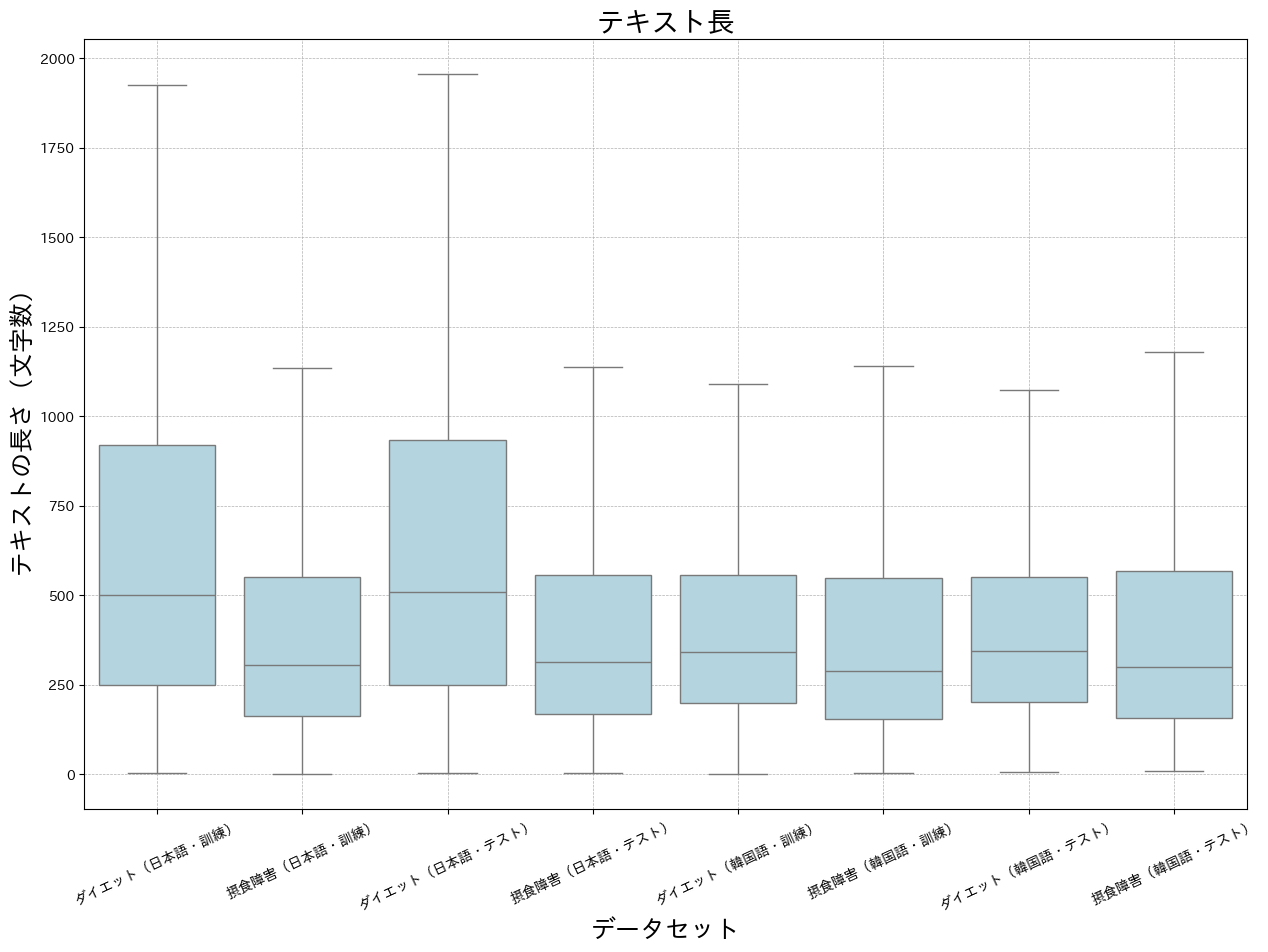

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データの読み込み
datasets = {
    "ダイエット（日本語・訓練）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_train.csv",
    "摂食障害（日本語・訓練）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_train.csv",
    "ダイエット（日本語・テスト）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv",
    "摂食障害（日本語・テスト）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv",
    "ダイエット（韓国語・訓練）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_train.csv",
    "摂食障害（韓国語・訓練）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_train.csv",
    "ダイエット（韓国語・テスト）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv",
    "摂食障害（韓国語・テスト）": "/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv",
}

# データを読み込み、文字数を計算
length_data = []
for name, path in datasets.items():
    df = pd.read_csv(path)
    text_lengths = df["text"].str.len()
    
    for length in text_lengths:
        length_data.append({"Dataset": name, "Text Length": length})

# データフレーム作成
length_df = pd.DataFrame(length_data)

# 可視化（外れ値を表示せず、色を変更）
plt.figure(figsize=(15, 10))

# sns.boxplotで箱ひげ図を描画
sns.boxplot(x="Dataset", y="Text Length", data=length_df, showfliers=False, color="lightblue")

# x軸とy軸のグリッドを表示
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  # y軸の破線
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)  # x軸の破線

# x軸ラベルとy軸ラベルを調整
plt.xticks(rotation=25)  # x軸のラベルを30度に調整
plt.xlabel("データセット", fontsize=18)
plt.ylabel("テキストの長さ（文字数）", fontsize=18)
plt.title("テキスト長", fontsize=20)

# グラフを表示
plt.show()

In [1]:
import pandas as pd
diet_j_train = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_train.csv')
disorder_j_train = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_train.csv')
diet_j_test = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_j_test.csv')
disorder_j_test = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_j_test.csv')

diet_k_train = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_train.csv')
disorder_k_train = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_train.csv')
diet_k_test = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/diet_k_test.csv')
disorder_k_test = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/split/disorder_k_test.csv')

In [5]:
len(diet_j_train)

23200

In [10]:
# 'text'列で重複をチェック
common_texts = pd.merge(diet_k_train[['text']], diet_k_test[['text']], on='text', how='inner')

# 重複するテキストの表示
print(f"重複するテキスト数: {len(common_texts)}")
print(common_texts.head())  # 重複しているテキストの一部を表示

重複するテキスト数: 0
Empty DataFrame
Columns: [text]
Index: []


In [3]:
# "text"列の文字数カウント
diet_j_train["text_length"] = diet_j_train["text"].str.len()
disorder_j_train["text_length"] = disorder_j_train["text"].str.len()
diet_j_test["text_length"] = diet_j_test["text"].str.len()
disorder_j_test["text_length"] = disorder_j_test["text"].str.len()

diet_k_train["text_length"] = diet_k_train["text"].str.len()
disorder_k_train["text_length"] = disorder_k_train["text"].str.len()
diet_k_test["text_length"] = diet_k_test["text"].str.len()
disorder_k_test["text_length"] = disorder_k_test["text"].str.len()

# 表示
print("ダイエット（日本語・訓練）")
print(diet_j_train["text_length"].describe())
print("\n摂食障害（日本語・訓練）")
print(disorder_j_train["text_length"].describe())

ダイエット（日本語・訓練）
count    23200.000000
mean       705.339310
std        697.531054
min          2.000000
25%        250.000000
50%        501.000000
75%        920.000000
max      13250.000000
Name: text_length, dtype: float64

摂食障害（日本語・訓練）
count    23200.000000
mean       429.102500
std        414.888674
min          1.000000
25%        163.000000
50%        305.000000
75%        552.000000
max       4400.000000
Name: text_length, dtype: float64


In [4]:
print("\nダイエット（日本語・テスト）")
print(diet_j_test["text_length"].describe())
print("\n摂食障害（日本語・テスト）")
print(disorder_j_test["text_length"].describe())


ダイエット（日本語・テスト）
count    5800.000000
mean      709.491379
std       700.412009
min         4.000000
25%       249.000000
50%       507.500000
75%       932.000000
max      7373.000000
Name: text_length, dtype: float64

摂食障害（日本語・テスト）
count    5800.000000
mean      435.197586
std       421.642720
min         3.000000
25%       169.000000
50%       312.000000
75%       556.000000
max      4059.000000
Name: text_length, dtype: float64


In [5]:
print("\nダイエット（韓国語・訓練）")
print(diet_k_train["text_length"].describe())
print("\n摂食障害（韓国語・訓練）")
print(disorder_k_train["text_length"].describe())


ダイエット（韓国語・訓練）
count    23200.000000
mean       448.612069
std        449.455738
min          1.000000
25%        199.000000
50%        341.000000
75%        556.000000
max      23455.000000
Name: text_length, dtype: float64

摂食障害（韓国語・訓練）
count    23200.000000
mean       461.408707
std        568.888676
min          3.000000
25%        155.000000
50%        288.000000
75%        549.000000
max      11819.000000
Name: text_length, dtype: float64


In [6]:
print("\nダイエット（韓国語・テスト）")
print(diet_k_test["text_length"].describe())
print("\n摂食障害（韓国語・テスト）")
print(disorder_k_test["text_length"].describe())


ダイエット（韓国語・テスト）
count    5800.00000
mean      443.51500
std       419.48208
min         5.00000
25%       201.00000
50%       343.00000
75%       550.00000
max      7842.00000
Name: text_length, dtype: float64

摂食障害（韓国語・テスト）
count    5800.000000
mean      477.315517
std       621.279732
min         9.000000
25%       156.000000
50%       299.000000
75%       566.000000
max      8897.000000
Name: text_length, dtype: float64


In [1]:
import pandas as pd
#データの読み込み
data = pd.read_csv('/home/is/sakiho-k/research/notebooks/eating_disorder/data/evaluation/japanese_model_results_testdata.csv')
#列名の表示
print(data.columns)

Index(['sex', 'age', 'user', 'url', 'date', 'title', 'text', 'category', 'TP',
       'FP', 'TN', 'FN'],
      dtype='object')


In [2]:
data.head()

,sex,age,user,url,date,title,text,category,TP,FP,TN,FN
0,女性,NaN,neige-pain,https://ameblo.jp/neige-pain/page-1506.html,2010-11-11,クリームパンとクリスマスリース,一昨日の夕方のレッスンではクリームパンのレッスンでした クリームパン カスタードクリームもご...,0,False,False,True,False
1,NaN,NaN,koge0603,https://ameblo.jp/koge0603/page-118.html,2024-06-27,♬6月27日昼♬,2024年4月中旬の健康診断 身長約160cm 体重約49Kg 空腹時血糖値111mgdL ...,0,False,False,True,False
2,男性,NaN,akibaboxinggym,https://ameblo.jp/akibaboxinggym/page-1499.html,2020-04-08,本日から臨時休業,安部総理大臣からの緊急事態宣言の発令を受けましてアキバヤタベボクシングフィットネスジムは本日...,0,False,False,True,False
3,女性,NaN,happybeauty0628,https://ameblo.jp/happybeauty0628/page-2467.html,2020-09-11,ドバっと出る！魔法の飲み物♪,ご訪問ありがとうございます このブログは ２５キロの減量に成功リバウンド一切なし その秘訣を...,0,False,False,True,False
4,女性,NaN,misatodiet,https://ameblo.jp/misatodiet/page-1623.html,2019-04-13,ダイエッター☆おでかけに必要なもの！,こんにちは 働くママの応援団長杉本みさとです モデル体型ダイエット塾インストラクター 今日は...,0,False,False,True,False


In [4]:
# 'category'列が0かつ'TN'列がTrueの行を抽出
tn_data = data[(data["category"] == 1) & data["TP"]]
# tn_dataの一行目のtext列を表示
print(tn_data.iloc[1]["text"])

こんにちは今日の9時に予定通り退院しました大量のラコールもらって主治医が年末年始大変になる前に入院してもいいからねって言ってくれました一旦家に帰って荷物整理してリハビリへ新しい装具をもらいましたPTさんとクリスマス料理やおせち料理の話になって盛り上がりましたそして帰りにしまむらでバッグを買いましたもう一個と悩んだけどこっちにしました自分へのクリスマスプレゼントです


In [27]:
print(tn_data.iloc[33]["text"])

こんばんは今日はしゅう就職相談の面談があったので重い腰をあげ外出朝ごはん普通に吸収する予定だったのに食べてたら食べたくなって結局卵かけご飯とか食べて嘔吐そしてまた吸収して出発終わったのがお昼すぎでお昼はヨーグルト食べてお終い夜ご飯は彼と晩御飯炭水化物はないけどガッツリお肉吸収美味しかったからよしとする最近かなり摂食強めだけど彼といる時は素直になれる気が明日も仕事ないけど月曜日からまた頑張らなきゃなぁ病院もあるのでボチボチではまたおやすみなさい
